## 機器學習應用於回歸（Regression）問題



###  線性迴歸(Linear Regression)，原理簡介

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

線性迴歸是非常直觀且常見的統計模型，建模迅速。

$y = ax + b $

a為斜率 (slope)

b為截距 (intercept)

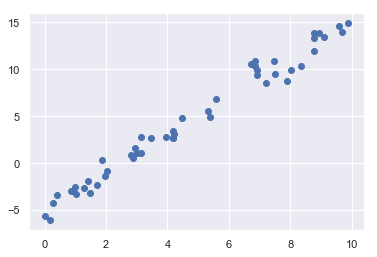

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);


希望由x值推導y值，得到一個 $y = ax + b $的算式

當然我們已知道事先答案為

斜率 (slope) 為 2

截距 (intercept) 為 -5

最佳解為 $y = 2x - 5 $

而線性迴歸(Linear Regression)就是找出一個算式，他的所有$f(x)$ 與個別y的直線距離最短


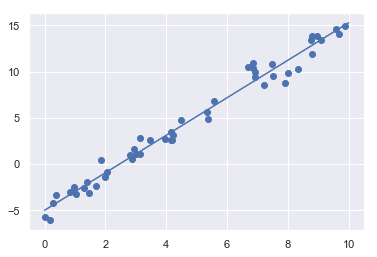

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()#定義函示

model.fit(x[:, np.newaxis], y) #訓練函數

xfit = np.linspace(0, 10, 1000)#產生1000個0~10的數

yfit = model.predict(xfit[:, np.newaxis])#進行預測

plt.scatter(x, y)
plt.plot(xfit, yfit);

查看訓練好模型中的參數

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


訓練好模型參數

斜率 (slope) 為 2.027208810360695

截距 (intercept) 為 -4.998577085553202

由於是計算所有$f(x)$ 與個別y的距離，因此離群值對線性迴歸(Linear Regression)的影響很大。

試著加入離群值

In [5]:
x = np.append(x, [15])# x 為15
y = np.append(y, [-5])# y 為-5

Model slope:     1.4874618143912828
Model intercept: -2.965028293068098


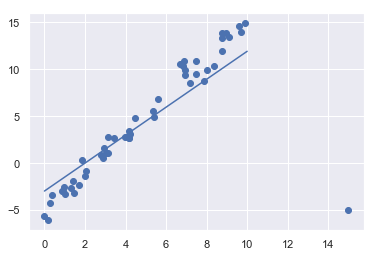

In [6]:

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.956872332537717
Model intercept: -4.670829313904164


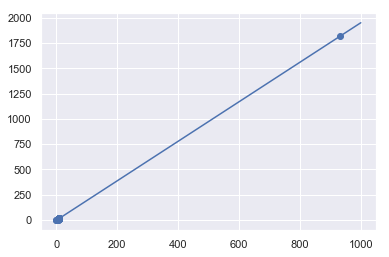

In [7]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

outlier_x = 10 * rng.rand(1)*100
outlier_y = 2 * outlier_x - 5 + rng.randn(1)*100
x = np.append(x, [outlier_x])# x 為15
y = np.append(y, [outlier_y])# y 為-5
 
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 1000, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

x 如過有多個值，則使用multiple Linear Regression，產生算試如下

$ y = b_0 + b_1x_1 + b_2x_2 + b_3x_3 ......$

In [8]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) # x 為1~100 隨幾3個數
y = 0.5 + np.dot(X, [1.5, -2., 1.]) # y等於三個數個別乘上 1.5, -2., 1. 再加0.5

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000064
[ 1.5 -2.   1. ]


當然我們不可能都遇到線性的問題。遇到非線性的問提可以用 polynomial Linear Regression的方法，產生算試如下

$ y = b_0 + b_1x_1 + b_1x_1^2......$

In [9]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

用pipeline串接兩個函式。

In [10]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

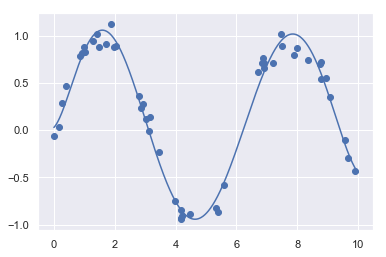

In [11]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

xfit = np.linspace(0, 10, 1000)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

----
### 實作線性迴歸

#### 預測PM2.5濃度模型

首先載入資料

df = pd.read_csv('./test_data1.csv')

df = df.iloc[:,1:]

df.index = df['datetime']

df = df.drop(['datetime'], axis =1)

print(df.head())

print(df.dtypes)

plt.figure(figsize=(50,10))

df['pm2.5'].plot()

train_test_split() 

函式將資料隨機分成訓練與測試資料集

test_size=0.3 訓練與測試資料的比率（七成為訓練資料，三成為測試資料）

.values 
函式將dataframe資料轉換為矩陣資料


from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values

y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X[:, :-1], y, test_size=0.3, random_state=42)

開始建立線性模型

from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(3),

                           LinearRegression())


poly_model.fit(X_train, y_train)

yfit = poly_model.predict(X_test)

-----
接著我們來評估訓練好的模型

mean_absolute_error


from sklearn.metrics import mean_absolute_error

print(np.sum(abs(y_test - yfit))/len(y_test))

mean_absolute_error(y_test, yfit)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


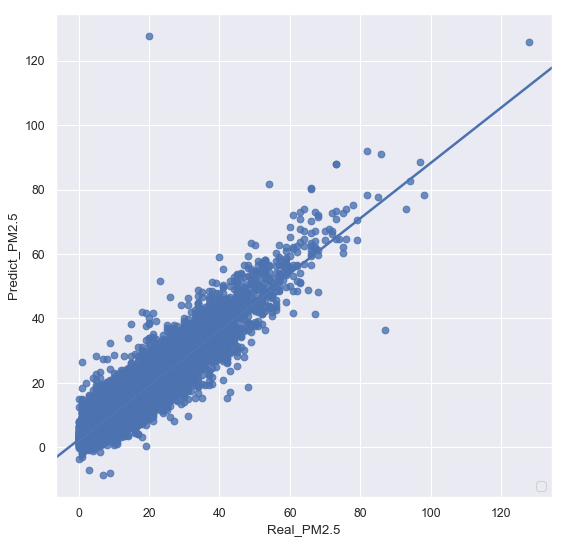

In [154]:
def relation(x,y,a,b):
    x = np.reshape(x,x.shape[0])
    y = np.reshape(y,y.shape[0])
    plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
    sns.regplot(x, y, ci=0)
    plt.legend(loc='lower right')
    plt.xlabel(a)
    plt.ylabel(b)
    plt.show()
    
relation(y_test,yfit,'Real_PM2.5','Predict_PM2.5')


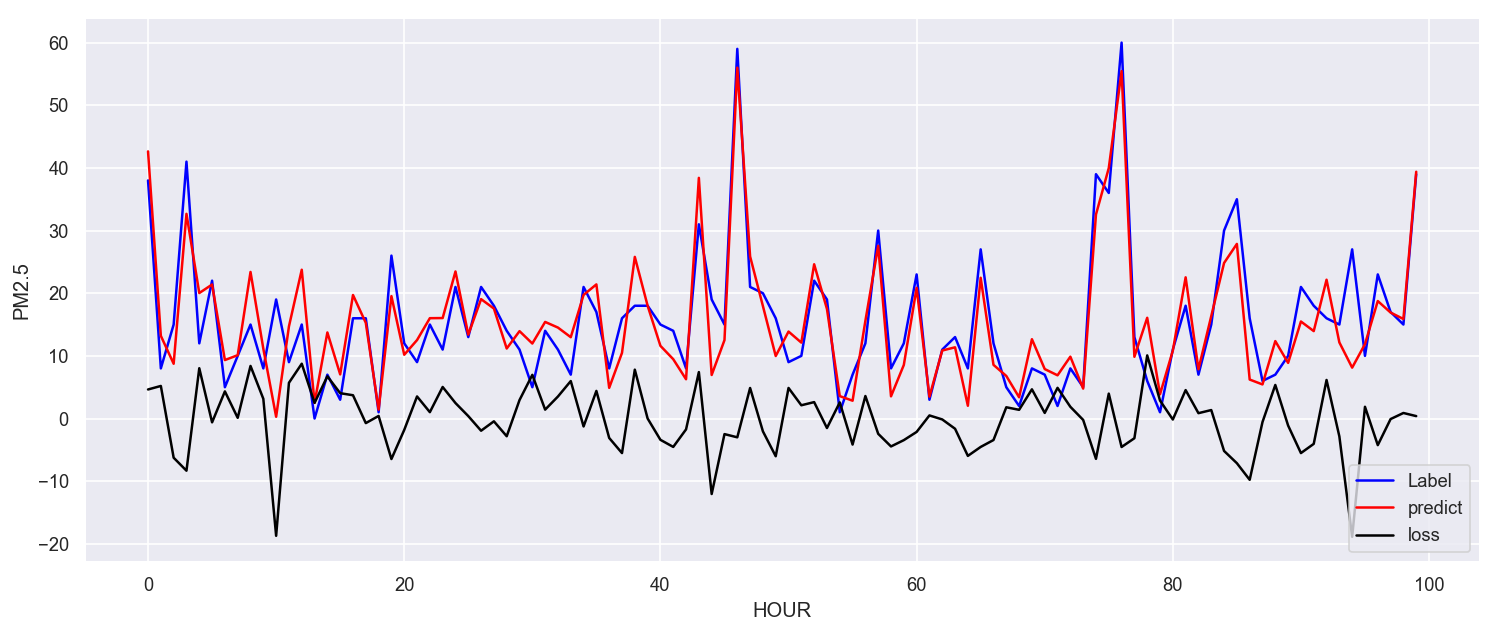

In [155]:
def PredictPicture(x,y,a,b):
    plt.figure(num=None, figsize=(15, 6), dpi=120, facecolor='w', edgecolor='k')
    plt.plot(x,c='blue',label='Label')
    plt.plot(y,c='red',label='predict')
    plt.plot(y-x,c='black',label='loss')
    plt.legend(loc='lower right')
    plt.xlabel(a)
    plt.ylabel(b)
    plt.show()
    
PredictPicture(y_test[:100],yfit[:100],'HOUR','PM2.5')

-----
# 機器學習應用於分群（Clustering）問題

### K-means，原理簡介

1. 從數據中選擇k個對象作為初始聚類中心;

2. 計算每個聚類對象到聚類中心的距離來劃分；

3. 再次計算每個聚類中心

4. 計算標準測度函數，之道達到最大疊代次數，則停止，否則，繼續操作。


歐式距離：

$dist(xi,xj)=\sum_{d=1}^{D}{(x_{id} − x_{jd})^2}$

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

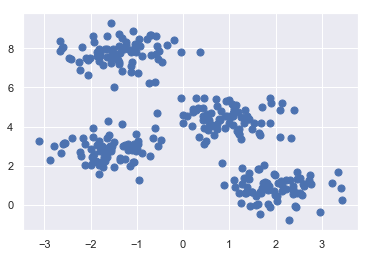

In [19]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

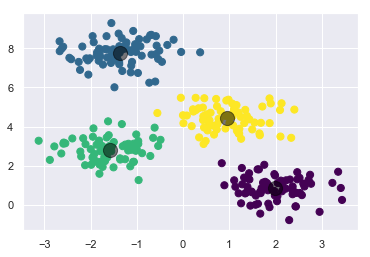

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### 實作K-means

#### 全臺PM2.5分群

* 假設我們想建立全台PM2.5預測模型，然而全台各地PM2.5變化各異，因此我們希望PM2.5變化相近的地區歸納為一個群集，為各區建立該地區的模型。

首先載入資料

df2 = pd.read_csv('./test_data2.csv')

df2.index = df2.iloc[:,0]

df2 = df2.iloc[:, 1:]

df2.head()

---
任取兩個測站，觀察變化。



plt.figure(figsize=(50,10))

df2['美濃'].iloc[-200:].plot()

df2['大同'].iloc[-200:].plot()

------
帶入資料前要先將dataframe轉置

透過 df.T

df2 = df2.T

df2.head()

到底要分幾群? 評估k值方法 

計算輪廓係數
http://www.taroballz.com/2018/07/19/ML_unsupervise_Kmeans/


In [1]:
from sklearn import cluster, metrics

data = df2.values#轉成矩正
silhouette_avgs =[]
ks = range(2, 11)
for k in ks:
    clf = cluster.KMeans(n_clusters = k).fit(data)
    cluster_labels = clf.labels_
    silhouette_avg = metrics.silhouette_score(data ,cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

NameError: name 'df2' is not defined

from sklearn.preprocessing import scale

from sklearn import cluster, metrics

data = df2.values#轉成矩正

clf = cluster.KMeans(init = 'k-means++', n_clusters=4, random_state=42)#定義函數

clf.fit(data)#訓練模型

clusters = clf.predict(data)

clusters

clusters_df = pd.DataFrame({'site':df2.index,'clusters':clusters})

clusters_df.head()

---

把資料畫到台灣地圖上

df3 = pd.read_csv('./test_data3.csv')

df3.head()

com1=pd.merge(clusters_df, df3, how='left', left_on=['site'], right_on =['測站名稱'])

com1.head()

In [26]:
import pandas as pd
import folium

lat = com1['緯度']
lon = com1['經度']
clusters = com1['clusters']

color = ['blue','orange', 'green','red',  'yellow',  'purple', 'black',  'olive','navy', 'tan']

Tmap = folium.Map([24 , 121], zoom_start=7)
for i in range(lat.shape[0]):
    Tmap.add_child(folium.Circle(location=[lat.iloc[i], lon.iloc[i]],
                                color=color[clusters.iloc[i]],
                                radius=100,
                                popup='<h5><strong>SITE_NO:</strong>'+str(com1['site'].iloc[i])+
                                 '<h5><strong>LATITUDE:</strong>'+str(lat.iloc[i])+
                                 '<h5><strong>LONGITUDE:</strong>'+str(lon.iloc[i]),
                                fill=True,
                                fill_opacity=0.7))
Tmap


NameError: name 'com1' is not defined

----

對各群做資料探索

df2 = df2.T

df2_sum = df2.sum()

df2_sum = pd.DataFrame(df2_sum, columns = ['pm2.5'])

df2_sum = df2_sum.reset_index()

df2_sum.head()

com3=pd.merge(clusters_df, df2_sum, how='left', left_on=['site'], right_on =['index'])

com3.head()


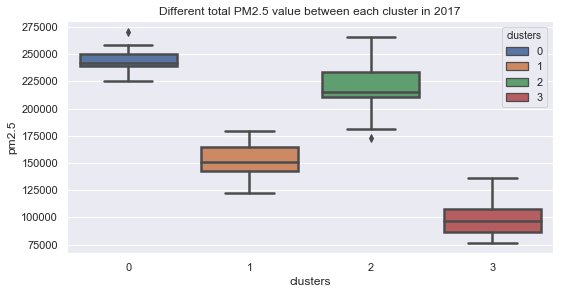

In [136]:

sns.set(rc={'figure.figsize':(8.7,4.27)})

ax = sns.boxplot(x="clusters", y="pm2.5", hue="clusters", data=com3, linewidth=2.5,dodge=False).set_title('Different total PM2.5 value between each cluster in 2017')

------
### 神經網路(多層感知機 Multilayer perceptron, MLP) 

df = pd.read_csv('./Tutorial/test_data1.csv')

df = df.iloc[:,1:]

df.index = df['datetime']

df = df.drop(['datetime'], axis =1)

df.head()


from sklearn.preprocessing import MinMaxScaler

np.random.seed( 10 )

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X)
dataset = scaler.transform(X)
                                       
x_train, x_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.3, random_state=0)

定義類神經網路

* 定義基本參數


* 定義類神經網路架構


* 將類神經網路架構與定義基本參數彙整(compile)


* 將資料匯入

from keras.models import Sequential

from keras.layers import Dropout, Dense

#定義基本參數
model_loss = 'mae' #損失函數

sgd = optimizers.SGD(lr=0.01, clipvalue=0.5) #優化器

model_metrics = ['mae','mape'] #每次訓練時呈現的評估值

fit_epochs =10 # 訓練的次數

fit_batch_size = 5 #每次訓練的批次量

dim = x_train.shape[1]# 代入第一層的神經元數量需要告知     

#定義類神經網路架構

model = Sequential() # 創建一個空的續貫(Sequential)模型

model.add(Dense(units=30,input_dim=dim,activation='elu'))#output = activation(dot(input, kernel)+bias)

model.add(Dense(units=50,activation='elu'))

model.add(Dense(units=80,activation='elu'))

model.add(Dense(units=100,activation='elu'))

model.add(Dense(units=130,activation='elu'))

model.add(Dense(units=150,activation='elu'))

model.add(Dense(units=180,activation='elu'))

model.add(Dropout(0.2))

model.add(Dense(units=200,activation= 'elu'))

model.add(Dropout(0.2))

model.add(Dense(units=300,activation= 'elu'))

model.add(Dropout(0.2))

model.add(Dense(units=350,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(units=1,activation='softmax'))

print(model.summary())

model.compile(loss=model_loss, optimizer=sgd, metrics=model_metrics)

train_history = model.fit(x=x_train, 
                          y=y_train,
                          epochs=fit_epochs, 
                          batch_size=fit_batch_size, 
                          verbose=2)


In [250]:
yfit = model.predict(x_test)
mean_absolute_error(y_test, yfit)


3.9402027559147186

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


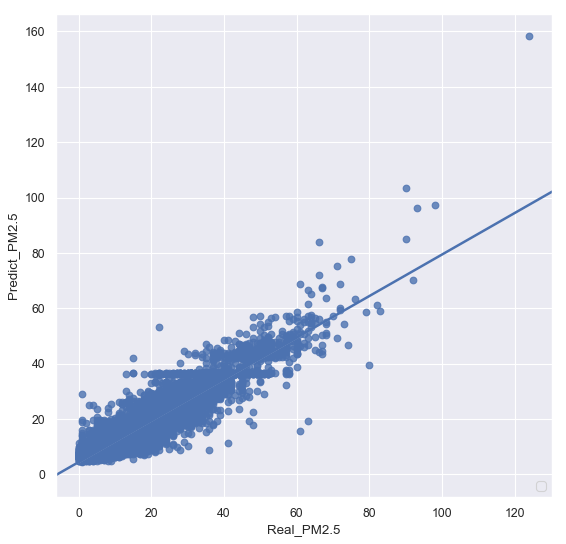

In [251]:
relation(y_test,yfit,'Real_PM2.5','Predict_PM2.5')

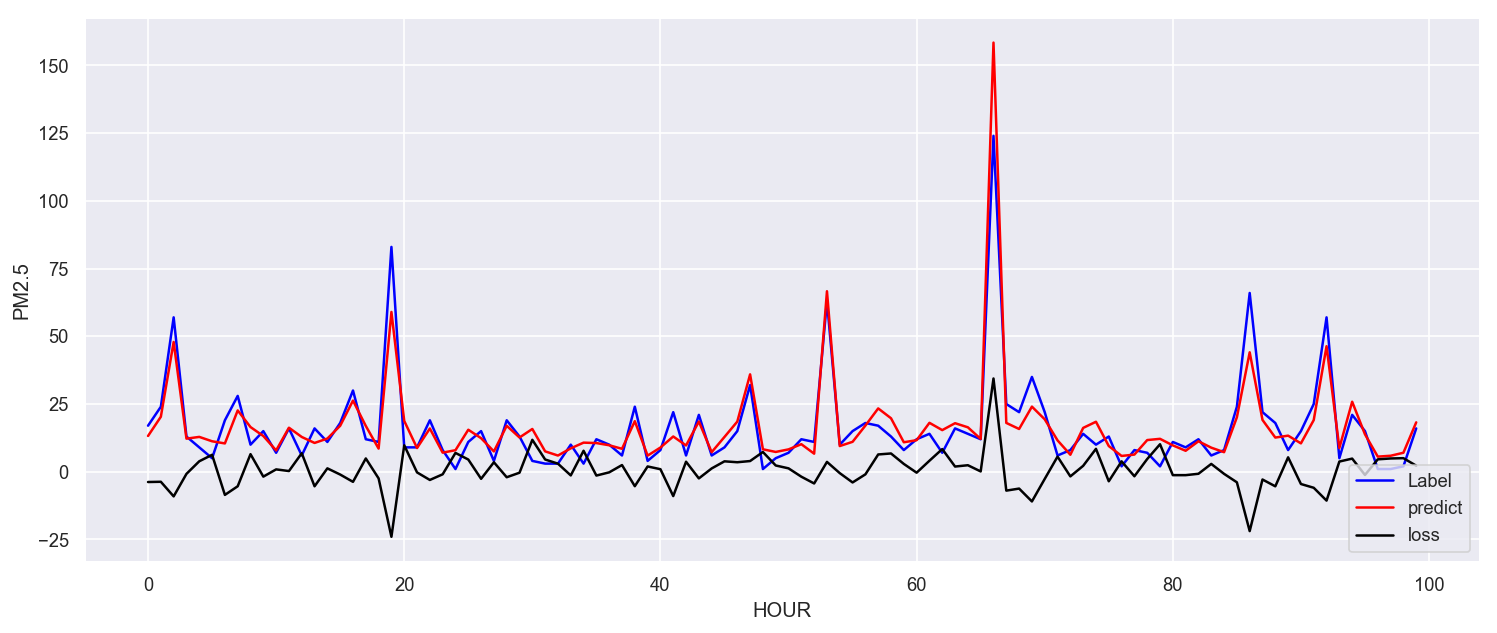

In [267]:
def PredictPicture(x,y,a,b):
    plt.figure(num=None, figsize=(15, 6), dpi=120, facecolor='w', edgecolor='k')
    plt.plot(x,c='blue',label='Label')
    plt.plot(y,c='red',label='predict')
    plt.plot(y-x,c='black',label='loss')
    plt.legend(loc='lower right')
    plt.xlabel(a)
    plt.ylabel(b)
    plt.show()
    
PredictPicture(y_test[:100],yfit[:100,0].tolist(),'HOUR','PM2.5')